### this notebook is under construction

# A simple CNN for the edge lover task


In this notebook you train a very simple CNN with only 1 kernel to discriminate between images containing vertical or horizontal edges. To check what pattern is recognized by the learned kernel you will visualize the weights of the kernel as an image. You can experiment with the code to check the influence of the kernel size, the activation function and the pooling method on the result.

The first section contains code to simulate some images containing either vertical or horizontal edges.  You need to execute it and then go directly to the CNN part.

<a href="https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_02/edge-lover-simple-cnn.ipynb"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="open in colab">
</a>
| [open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_02/edge-lover-simple-cnn.ipynb)

### Loading the required libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import skimage.draw

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Convolution2D, MaxPooling2D, Flatten, AveragePooling2D
from keras.utils  import to_categorical

### Defining functions to simulate images 

In [0]:
def genearte_image_with_bars_vertical(size,bar_nr):
  img=np.zeros((size,size,1),dtype="uint8")
  for i in range(0,bar_nr):
    x,y = np.random.randint(0,size,2)
    l  = np.int(np.random.randint(y,size,1))
    img[y:l,x,0]=255
  return img  

In [0]:
def genearte_image_with_bars_horizontal(size,bar_nr):
  img=np.zeros((size,size,1),dtype="uint8")
  for i in range(0,bar_nr):
    x,y = np.random.randint(0,size,2)
    l  = np.int(np.random.randint(y,size,1))
    img[x,y:l,0]=255
  return img  

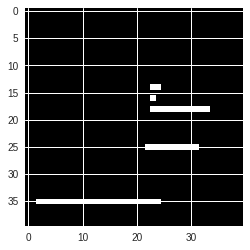

In [75]:
# have a look on a generated image
img=genearte_image_with_bars_horizontal(40,5)
plt.imshow(img[:,:,0],cmap='gray')
plt.show()

In [76]:
pixel=50  # define width and height of images

# generate train data with vertical edges
x_train_1=np.zeros((1000,pixel,pixel,1))
for i in range(0,len(x_train_1)):
   x_train_1[i]=genearte_image_with_bars_vertical(pixel,10)

# generate validation data with vertical edges
x_val_1=np.zeros((1000,pixel,pixel,1))
for i in range(0,len(x_val_1)):
   x_val_1[i]=genearte_image_with_bars_vertical(pixel,10)
    
# generate train data with horizontal edges
x_train_2=np.zeros((1000,pixel,pixel,1))
for i in range(0,len(x_train_2)):
   x_train_2[i]=genearte_image_with_bars_horizontal(pixel,10)
    
# generate validation data with horizontal edges
x_val_2=np.zeros((1000,pixel,pixel,1))
for i in range(0,len(x_val_2)):
   x_val_2[i]=genearte_image_with_bars_horizontal(pixel,10)
    
X_train = np.concatenate([x_train_1,x_train_2],axis=0)
X_val = np.concatenate([x_val_1,x_val_2],axis=0)

# here we scale the data to be between -1 and 1
X_train=((X_train/255)-0.5)*2
X_val=((X_val/255)-0.5)*2

X_train.shape


(2000, 50, 50, 1)

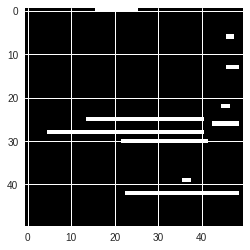

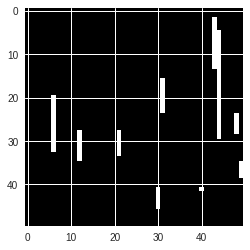

In [77]:
# visualize an image example with horizontal and vertical edges
plt.imshow(X_val[1001,:,:,0], cmap="gray")
plt.show()
plt.imshow(X_train[0,:,:,0], cmap="gray")
plt.show()

In [0]:
# create class labels
y = np.array([[0],[1]])
Y_train = np.repeat(y, 1000)
Y_val = np.repeat(y, 1000)

# one-hot-encoding
Y_train=to_categorical(Y_train,2)
Y_val=to_categorical(Y_val,2)

## Defining the CNN

We use keras to define a CNN with only one convoultional layer that hold only 1 neuron.

In [0]:
model = Sequential()

model.add(Convolution2D(1,(7,7),padding='same',input_shape=(pixel,pixel,1)))
model.add(Activation('linear'))
# take the max over all values in the activation map
model.add(MaxPooling2D(pool_size=(pixel,pixel)))
model.add(Flatten()) 
model.add(Dense(2))
model.add(Activation('softmax'))

# compile model and initialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [80]:
# let's summarize the CNN architectures along with the number of model weights
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 50, 50, 1)         50        
_________________________________________________________________
activation_13 (Activation)   (None, 50, 50, 1)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 1)           0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 4         
_________________________________________________________________
activation_14 (Activation)   (None, 2)                 0         
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________________


In [81]:
# train the model
history=model.fit(X_train, Y_train,
                  validation_data=(X_val,Y_val),
                  batch_size=64, 
                  epochs=15,
                  verbose=1,
                  shuffle=True) 

Train on 2000 samples, validate on 2000 samples
Epoch 1/10
2000/2000 [==============================] - 8s 4ms/step - loss: 1.0873 - acc: 0.5000 - val_loss: 0.8788 - val_acc: 0.5000
Epoch 2/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.7786 - acc: 0.5000 - val_loss: 0.6984 - val_acc: 0.5000
Epoch 3/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.6583 - acc: 0.5000 - val_loss: 0.6187 - val_acc: 0.5000
Epoch 4/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.5905 - acc: 0.5170 - val_loss: 0.5583 - val_acc: 0.6780
Epoch 5/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.5320 - acc: 0.7240 - val_loss: 0.4989 - val_acc: 0.8345
Epoch 6/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.4742 - acc: 0.8910 - val_loss: 0.4412 - val_acc: 0.9230
Epoch 7/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.4196 - acc: 0.9520 - val_loss: 0.3895 - val_acc: 0.9760
Epoch 8/10
200

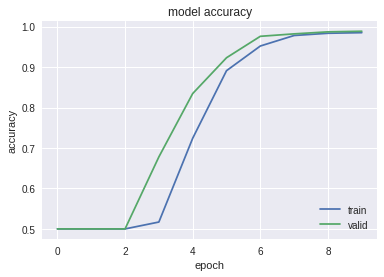

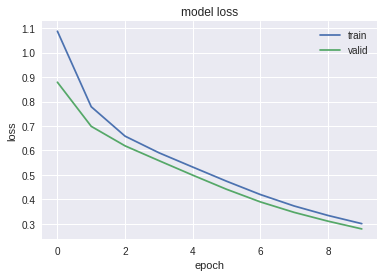

In [82]:
# summarize development of accuracy and loss during training
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

### Visualize the learned kernel and experiment with the code

You can now check which pattern is recognized by the learned kernel and see if you think that this is helpful to distinguish between images with horizontal and vertical edges. Repeat the compiling and training for several times and check if the CNN always learns the same kernel. 

You can experiment with the code and check what happens if you use another kernel size, activation function (relu instead of linear ) or pooling method AveragePooling instead of MaxPooling. Try to make a prediction before doing the experiment.

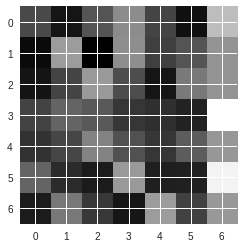

In [83]:
# get the leared weights and display them as image
conv_filter=model.get_weights()[0]
conv_filter.shape
conv_filter=np.squeeze(conv_filter, axis=2)
conv_filter.shape
plt.imshow(conv_filter[:,:,0],cmap="gray")